# Model Error Finder

## Something's Wrong and We're Gonna Find It!

### It's time for some ADVANCED bug finding...

Okay so there's an issue. The issue is that the iephi models we've been making don't make any sense, at least when considering the simulation data.

## FIRST

### Data Examination

Let's examine the data directly. The best and most full models we have are going to be the easiest. So this first step is simply to read in the data and display both it and its metadata.

In [19]:
#INGEST A SINGLE SIM CUBE and EXAMINE ITS METADATA.

#So making a full animation is just going to be PAIN, so instead we'll have it print out the individual 
#frames for said animation instead of trying to hold the entire thing at once. 
#Which would suck.
#Good news, this means we don't have to work with the animation software!

filepathA = r"C:\Users\deran\Desktop\DooseCSV\2012_A0.2_p"
angles = ["000", "005", "010", "015", "020", "025", "030", "035", "040", "045", "050", "055", "060", "065", "070", "075",
             "080", "085", "090", "095", "100", "105", "110", "115", "120", "125", "130", "135", "140", "145", "150", "155",
             "160", "165", "170", "175", "180", "185", "190", "195", "200", "205", "210", "215", "220", "225", "230", "235",
             "240", "245", "250", "255", "260", "265", "270", "275", "280", "285", "290", "295", "300", "305", "310", "315", 
             "320", "325", "330", "335", "340", "345", "350", "355"] 
filepathB = r"_colorCCD.Jcube.csv"

import csv
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
#import mpl_interactions.ipyplot as iplt
import matplotlib.image as mpimg
import scipy.misc
from scipy import ndimage
from pyvims import VIMS
from matplotlib.colors import LogNorm



<>:224: SyntaxWarning: invalid escape sequence '\m'
<>:225: SyntaxWarning: invalid escape sequence '\m'
<>:226: SyntaxWarning: invalid escape sequence '\m'
<>:227: SyntaxWarning: invalid escape sequence '\m'
<>:229: SyntaxWarning: invalid escape sequence '\m'
<>:230: SyntaxWarning: invalid escape sequence '\m'
<>:231: SyntaxWarning: invalid escape sequence '\m'
<>:232: SyntaxWarning: invalid escape sequence '\m'
<>:224: SyntaxWarning: invalid escape sequence '\m'
<>:225: SyntaxWarning: invalid escape sequence '\m'
<>:226: SyntaxWarning: invalid escape sequence '\m'
<>:227: SyntaxWarning: invalid escape sequence '\m'
<>:229: SyntaxWarning: invalid escape sequence '\m'
<>:230: SyntaxWarning: invalid escape sequence '\m'
<>:231: SyntaxWarning: invalid escape sequence '\m'
<>:232: SyntaxWarning: invalid escape sequence '\m'
C:\Users\deran\AppData\Local\Temp\ipykernel_31140\881397892.py:224: SyntaxWarning: invalid escape sequence '\m'
  axs[0,0].set(title="0.93 $\mu$m")
C:\Users\deran\AppDa

1.0
0.0


C:\Users\deran\AppData\Local\Temp\ipykernel_31140\881397892.py:169: RuntimeWarning: invalid value encountered in scalar divide
  ratio = -(np.cos(np.radians(p)) - np.cos(np.radians(inci))* np.cos(np.radians(emis)))/(np.sin(np.radians(inci))*np.sin(np.radians(emis)))
C:\Users\deran\AppData\Local\Temp\ipykernel_31140\881397892.py:170: RuntimeWarning: invalid value encountered in arccos
  azim = np.arccos(ratio)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.4588205343516787e-16..2.6199081081081084].


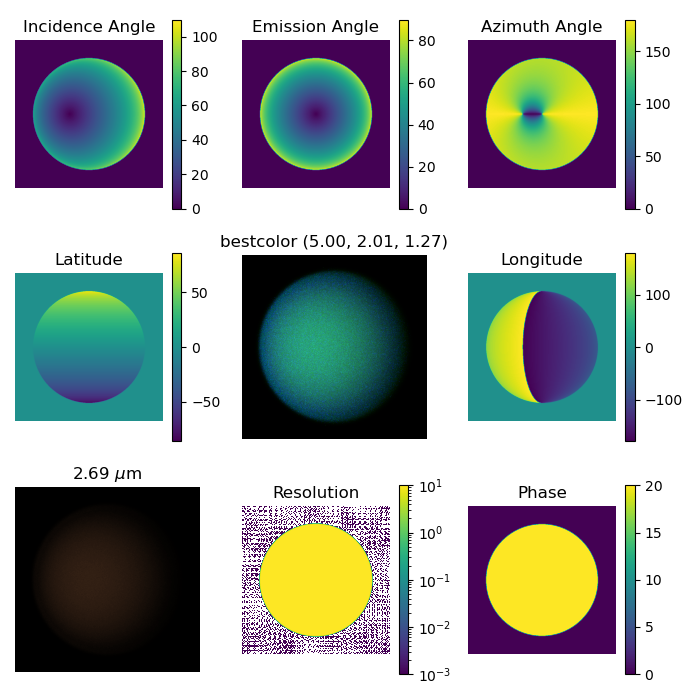

In [20]:
%matplotlib ipympl

filepath = filepathA + angles[4] + filepathB

#Now we extract the axes file as well...
cubeAxesfp = filepath.removesuffix(".csv") + ".axes.csv"

#And you know what why not all the others as well.
cubeGeofpIR = filepath.removesuffix("colorCCD.Jcube.csv") + "geo.Jcube.csv"
cubeGeofpIRaxes = filepath.removesuffix("colorCCD.Jcube.csv") + "geo.Jcube.axes.csv"
#Basically, we don't use axesfp if it's not needed.

#Skeleton code nabbed from https://realpython.com/python-csv/
#We need to be able to handle both local and other cubes. 
#Pyvims can help us, but as I don't want to redo all the code we'll find a way to store
#it in the way the code understands.

#Step 1: use the axes to determine the size of what we're dealing with.

xAxisCube = []
yAxisCube = []
zAxisCube = []

xAxisGeoIR = []
yAxisGeoIR = []
zAxisGeoIR = []

with open(cubeAxesfp) as csv_file: #remember to tab.
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            i = 0
            L = len(row)
            while (i < L-1):
                if (line_count == 0):
                    xAxisCube.append(row[i])
                elif (line_count == 1):
                    yAxisCube.append(row[i])
                elif (line_count == 2):
                    zAxisCube.append(row[i])
                i = i+1
            line_count += 1

with open(cubeGeofpIRaxes) as csv_file: #remember to tab.
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            i = 0
            L = len(row)
            while (i < L-1):
                if (line_count == 0):
                    xAxisGeoIR.append(row[i])
                elif (line_count == 1):
                    yAxisGeoIR.append(row[i])
                elif (line_count == 2):
                    zAxisGeoIR.append(row[i])
                i = i+1
            line_count += 1

#wvlns: (alt: 2) contains the wavelengths, equivalent to our zAxis.
#Shape contains cube size. Probably wxy, but may be wyx? NB is bands (w) and NL is lines (x or y?)
#lat, lon: position! 
#ground_inc, ground_eme, ground_azi: incidence and emission AND azimuth
    
#We now have an x, y, and z axis. x and y axes are just ordinal, but the z axis contains wavelength in microns.
#The lengths of these arrays tell us how to extract the data.

cubeData = [[[0 for x in range(len(zAxisCube))] for x in range(len(yAxisCube))] for x in range(len(xAxisCube))]
geoIRData = [[[0 for x in range(len(zAxisGeoIR))] for x in range(len(yAxisGeoIR))] for x in range(len(xAxisGeoIR))]

#The above holds the data of the cube itself. 

with open(filepath) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < len(xAxisCube)):
            cubeData[i][j][k] = float(row[i])
            if (math.isnan(cubeData[i][j][k])):
                cubeData[i][j][k] = 0 #We set nans to zero to allow plotting to take place, careful!
            elif (cubeData[i][j][k] < 0):
                cubeData[i][j][k] = 0 #Negative values are nonsense.
            elif (cubeData[i][j][k] > 1):
                cubeData[i][j][k] = 1 #Make saturation obvious? Keep it from overloading. 
            i = i + 1
        i = 0
        j = j + 1
        if (j >= len(yAxisCube)):
            j = 0
            k = k + 1
        line_count += 1

with open(cubeGeofpIR) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < len(xAxisGeoIR)):
            geoIRData[i][j][k] = float(row[i])
            if (math.isnan(geoIRData[i][j][k])):
                geoIRData[i][j][k] = 0 #We set nans to zero to allow plotting to take place, careful!
            elif (geoIRData[i][j][k] < -1000):
                geoIRData[i][j][k] = 0 #The default value is an extremely negative number. Scrub it.
            i = i + 1
        i = 0
        j = j + 1
        if (j >= len(yAxisGeoIR)):
            j = 0
            k = k + 1
        line_count += 1

#helpful declarations
#Wavelength of windows in microns (um)
windowum = [0.933078, 1.08183, 1.27813, 1.59018, 2.01781, 2.69620, 2.79889, 5.00576]
#Now we need to dynamically find the indeces where this is true. 
windowInd = [0,1,2,3,4,5,6,7]
    
#image dimensions are fungible. Calculate them.  
xDim = 0
yDim = 0
if (len(xAxisCube) > len(yAxisCube)):
    yDim = 9 
    xDim = 9/(len(xAxisCube)/len(yAxisCube))
else:
    xDim = 9
    yDim = 9/(len(yAxisCube)/len(xAxisCube))
#This may seem backward, but transpositions occur so...

    
print(np.amax(cubeData))
print(np.amin(cubeData))
temp = np.transpose(cubeData)
tempG = np.transpose(geoIRData)

fig, axs = plt.subplots(3,3, figsize = (7,7), layout = "tight") 

#Windows are, according to lambertian_wholedisk:
#0.933078, 1.08183, 1.27813, 1.59018, 2.01781, 2.69620, 2.79889, 5.00576



c6 = axs[2,0].imshow((temp[windowInd[5]]), cmap="copper",vmax=2/3)

c1 = axs[0,0].imshow((np.transpose(geoIRData)[5]), cmap="viridis")
fig.colorbar(c1, ax=axs[0][0])
c2 = axs[0,1].imshow((np.transpose(geoIRData)[6]), cmap="viridis")
fig.colorbar(c2, ax=axs[0][1])
#azimuth moved, there's a conditional we need to deal with.
c4 = axs[1,0].imshow((np.transpose(geoIRData)[0]), cmap="viridis")
fig.colorbar(c4, ax=axs[1][0])
c5 = axs[1,2].imshow((np.transpose(geoIRData)[1]), cmap="viridis")
fig.colorbar(c5, ax=axs[1][2])
#NormFactor moved elsewhere, more steps required.
c7 = axs[2,1].imshow((np.transpose(geoIRData)[2]), cmap="viridis", norm=LogNorm(vmin=0.001))
fig.colorbar(c7, ax=axs[2][1])
c8 = axs[2,2].imshow((np.transpose(geoIRData)[4]), cmap="viridis")
fig.colorbar(c8, ax=axs[2][2])

#Azimuth is dealt with differently
cubeAzimuth = 180 - np.transpose(np.transpose(geoIRData)[7])
i,j = 0,0
while (i < len(xAxisCube)):
    j = 0
    while (j < len(yAxisCube)):
        p = geoIRData[i][j][4] #used to calculate azimuth.
        inci = geoIRData[i][j][5]
        emis = geoIRData[i][j][6]
        ratio = -(np.cos(np.radians(p)) - np.cos(np.radians(inci))* np.cos(np.radians(emis)))/(np.sin(np.radians(inci))*np.sin(np.radians(emis)))
        azim = np.arccos(ratio) 
        #Of course, this might be nan-ing. All the nans need their own values.
        if((math.isnan(azim) == True) and (ratio>0.)):
            azim = 0.
        elif((math.isnan(azim) == True) and (ratio<0.)):
            azim = 3.14159 #pi 
        elif((inci==0) and (emis==0)):
            azim = 0.
        elif(math.isnan(azim) == True):
            print("Well you broke it, great. (Azimuth is nan, but could not be set to anything else.)")
        cubeAzimuth[i][j] = math.degrees(azim)
        j = j+1
    i = i+1   
    
c3 = axs[0,2].imshow(np.transpose(cubeAzimuth), cmap="viridis")
fig.colorbar(c3, ax=axs[0][2])


axs[0,0].axis('off')
axs[0,1].axis('off')
axs[0,2].axis('off')
axs[1,0].axis('off')
axs[1,1].axis('off')
axs[1,2].axis('off')
axs[2,0].axis('off')
axs[2,1].axis('off')
axs[2,2].axis('off')
axs[1,1].axis('off')

#COLOR

mod = 1.

# set R, G, and B
R = temp[7]/(mod*1.12) #I am still very unsure why we don't have the 1/16 here when we have it in both places in the full thing, but whatever.
G = temp[4]/(mod*0.22)
B = (temp[2]-0.03)/(mod*0.37)

#B's value can introduce negatives, remove them.
i,j = 0,0
for x in B:
    j=0
    for y in x:
        if (y < 0):
            B[i][j] = 0
        j = j+1
    i = i+1

# Now we need to combine them in the correct form: xyc, that is, x, y, then color value. 
colorData = [R,G,B] # arranged in cyx. I thought RGB needed to be transposed but evidentialy not. Hmm.
colorData = np.transpose(colorData) #arranged in xyc

image = axs[1,1].imshow(ndimage.rotate(colorData,90), origin="lower") 

axs[0,0].set(title="0.93 $\mu$m")
axs[0,1].set(title="1.08 $\mu$m")
axs[0,2].set(title="1.27 $\mu$m")
axs[1,0].set(title="1.59 $\mu$m")
axs[1,1].set(title="bestcolor (5.00, 2.01, 1.27)")
axs[1,2].set(title="2.01 $\mu$m")
axs[2,0].set(title="2.69 $\mu$m")
axs[2,1].set(title="2.79 $\mu$m")
axs[2,2].set(title="5.00 $\mu$m")

axs[0,0].set(title="Incidence Angle")
axs[0,1].set(title="Emission Angle")
axs[0,2].set(title="Azimuth Angle")
axs[1,0].set(title="Latitude")

axs[1,2].set(title="Longitude")

axs[2,1].set(title="Resolution")
axs[2,2].set(title="Phase")

#plt.savefig("NewDooseA0.2Ani" + angles[angleIndex] + ".png", format="png") 

plt.show()

In [ ]:
#METADATA 
#Same arrangement as above, but examinming the metadata instead.

#DISPLAY: CUBE
#Just to show the cube we are reading in.
fig, axs = plt.subplots(3,3, figsize = (9,9), layout = "constrained") 

#Windows are, according to lambertian_wholedisk:
#0.933078, 1.08183, 1.27813, 1.59018, 2.01781, 2.69620, 2.79889, 5.00576

c1 = axs[0,0].imshow((np.transpose(geoIRData)[5]), cmap="viridis")
fig.colorbar(c1, ax=axs[0][0])
c2 = axs[0,1].imshow((np.transpose(geoIRData)[6]), cmap="viridis")
fig.colorbar(c2, ax=axs[0][1])
#azimuth moved, there's a conditional we need to deal with.
c4 = axs[1,0].imshow((np.transpose(geoIRData)[0]), cmap="viridis")
fig.colorbar(c4, ax=axs[1][0])
c5 = axs[1,2].imshow((np.transpose(geoIRData)[1]), cmap="viridis")
fig.colorbar(c5, ax=axs[1][2])
#NormFactor moved elsewhere, more steps required.
c7 = axs[2,1].imshow((np.transpose(geoIRData)[2]), cmap="viridis", norm=LogNorm(vmin=0.001))
fig.colorbar(c7, ax=axs[2][1])
c8 = axs[2,2].imshow((np.transpose(geoIRData)[4]), cmap="viridis")
fig.colorbar(c8, ax=axs[2][2])

#NormFactor needs to know the brightness of every pixel.
#renamed Total Window Intensity. It really is just the addition of the 8 atmospheric windows.
normPixels = np.transpose(np.transpose(geoIRData)[6])*0.
i,j = 0,0
while (i < len(xAxisCube)):
    j = 0
    while (j < len(yAxisCube)):
        pixelWindows = [0.,0.,0.,0.,0.,0.,0.,0.]
        k = 0
        #print(i,j, len(xAxisCube), len(yAxisCube))
        while (k < 8):
            pixelWindows[k] = temp[windowInd[k]][j][i] #Backward since temp itself is in yx.
            k = k+1
        totalPixelLight = 0.
        for item in pixelWindows:
            totalPixelLight = totalPixelLight + item
        normPixels[i][j] = totalPixelLight
        #Commented optional portion: transform the Total Window Intensity into 
        #a view of an atmosphere window ascaled by the same.
        #normPixels[i][j] =  np.transpose(temp[windowInd[7]])[i][j] / totalPixelLight
        j = j+1
    i = i+1    
    
c6 = axs[2,0].imshow(np.transpose(normPixels), cmap="viridis")
fig.colorbar(c6, ax=axs[2][0])

#Azimuth is dealt with differently when using Jcube and PyVIMS
cubeAzimuth = 180 - np.transpose(np.transpose(geoIRData)[7])
if (filepath != realCube):
    i,j = 0,0
    while (i < len(xAxisCube)):
        j = 0
        while (j < len(yAxisCube)):
            p = geoIRData[i][j][4] #used to calculate azimuth.
            inci = geoIRData[i][j][5]
            emis = geoIRData[i][j][6]
            ratio = -(np.cos(np.radians(p)) - np.cos(np.radians(inci))* np.cos(np.radians(emis)))/(np.sin(np.radians(inci))*np.sin(np.radians(emis)))
            azim = np.arccos(ratio) 
            #Of course, this might be nan-ing. All the nans need their own values.
            if((math.isnan(azim) == True) and (ratio>0.)):
                azim = 0.
            elif((math.isnan(azim) == True) and (ratio<0.)):
                azim = 0.
            elif((inci==0) and (emis==0)):
                azim = 0.
            elif(math.isnan(azim) == True):
                print("Well you broke it, great. (Azimuth is nan, but could not be set to anything else.)")
            cubeAzimuth[i][j] = math.degrees(azim)
            j = j+1
        i = i+1   

    #Of course, this might be nan-ing. All the nans need their own values.
    if((math.isnan(azim) == True) and (ratio>0.)):
        azim = 0.
    elif((math.isnan(azim) == True) and (ratio<0.)):
        azim = 0.
    elif((inci==0) and (emis==0)):
        azim = 0.
    elif(math.isnan(azim) == True):
        print("Well you broke it, great. (Azimuth is nan, but could not be set to anything else.)")
    
c3 = axs[0,2].imshow(np.transpose(cubeAzimuth), cmap="viridis")
fig.colorbar(c3, ax=axs[0][2])

axs[0,0].axis('off')
axs[0,1].axis('off')
axs[0,2].axis('off')
axs[1,0].axis('off')
axs[1,1].axis('off')
axs[1,2].axis('off')
axs[2,0].axis('off')
axs[2,1].axis('off')
axs[2,2].axis('off')
axs[1,1].axis('off')

image = axs[1,1].imshow(ndimage.rotate(colorData,90),origin="lower") 
#The rotation is undone here using rotate(). 

axs[0,0].set(title="Incidence Angle")
axs[0,1].set(title="Emission Angle")
axs[0,2].set(title="Azimuth Angle")
axs[1,0].set(title="Latitude")
axs[1,1].set(title="bestcolor (~5.00, 2.01, 1.27)")
axs[1,2].set(title="Longitude")
axs[2,0].set(title="Total Window Intensity")
axs[2,1].set(title="Resolution")
axs[2,2].set(title="Phase")

plt.show()